# **Imports**
---

In [12]:
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud
from collections import defaultdict

import joblib

In [81]:
df_raw = joblib.load(r"../../Data\preproccesed\Spotify_clean.pkl")

In [82]:
df_raw

,Review,Rating,Sentiment
0,"Great music service, the audio is high quality...",5,Positive
1,Please ignore previous negative rating. This a...,5,Positive
2,"This pop-up ""Get the best Spotify experience o...",4,Positive
3,Really buggy and terrible to use as of recently,1,Negative
4,Dear Spotify why do I get songs that I didn't ...,1,Negative
...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,Negative
61590,"Use to be sooo good back when I had it, and wh...",1,Negative
61591,This app would be good if not for it taking ov...,2,Negative
61592,The app is good hard to navigate and won't jus...,2,Negative


In [75]:

df_proccesed = joblib.load(r"../../Data\preproccesed\Spotify_processed.pkl")

# **Basic data cleaning**
---
- Checking for null values
- Checking for duplicates
- remove null and duplicates if they do exist

In [56]:
df_raw.isnull().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

In [57]:
df_raw.duplicated().sum()

np.int64(549)

In [58]:
df_proccesed.isnull().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

In [72]:
df_proccesed.duplicated().sum()

np.int64(549)

In [19]:
df_proccesed = df_proccesed.drop_duplicates()

# **Basic EDA before lemma and stop words remover**

# **EDA**
---

Finding patterns in data

In [20]:
df_raw["Review"].str.len()

0        112
1         86
2        106
3         47
4        100
        ... 
61388    279
61389    263
61390    493
61391    272
61392    216
Name: Review, Length: 61393, dtype: int64

In [22]:
df_raw["Lenght"] = df_raw["Review"].str.len()

In [23]:
print(f"Minimal kata : {df_raw["Lenght"].min()}" )
print(f"Max kata : {df_raw["Lenght"].max()}" )
print(f"mean lenght kata : {df_raw["Lenght"].mean()}" )
print(f"median lenght kata : {df_raw["Lenght"].median()}" )

Minimal kata : 10
Max kata : 3753
mean lenght kata : 163.79507435701137
median lenght kata : 130.0


# Deeper EDA
---

<Axes: xlabel='Lenght', ylabel='Lenght'>

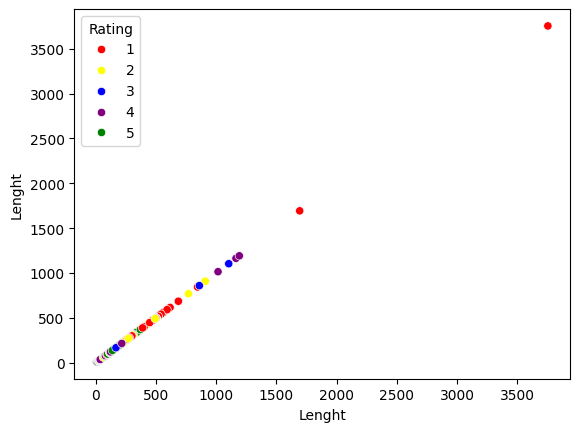

In [24]:
custom_colors = ["red", "yellow", "blue", "purple", "green"]
sns.scatterplot(y = df_raw["Lenght"], x = df_raw["Lenght"], hue = df_raw['Rating'], palette = custom_colors)

<Axes: ylabel='Frequency'>

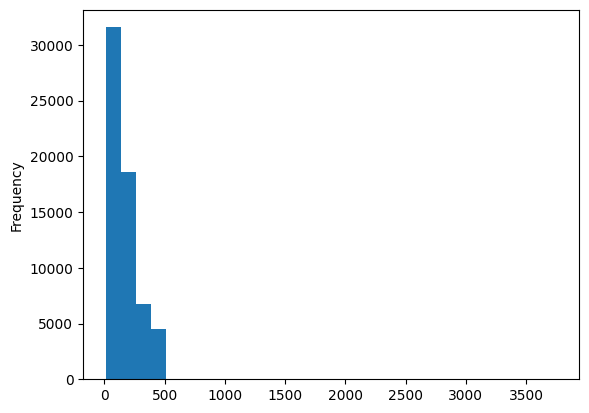

In [25]:
df_raw["Lenght"].plot(kind= "hist", bins = 30)

Text(0.5, 1.0, 'Words lenght to rating')

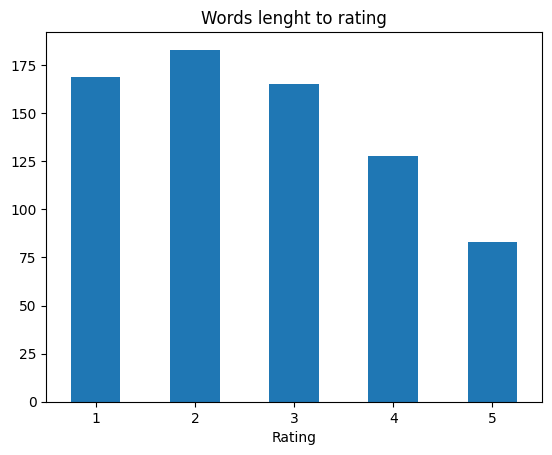

In [26]:

df_raw.groupby("Rating")["Lenght"].median().plot(kind= "bar")
plt.xticks(rotation = 0)
plt.title("Words lenght to rating")


Text(0.5, 1.0, 'Words lenght to sentiment')

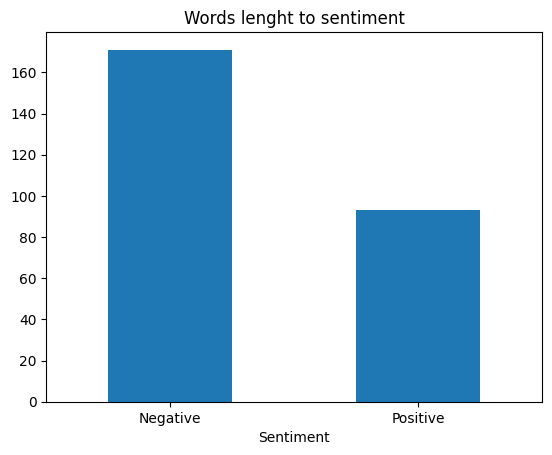

In [27]:
df_raw.groupby('Sentiment')["Lenght"].median().plot(kind= "bar")
plt.xticks(rotation = 0)
plt.title("Words lenght to sentiment")

<Axes: xlabel='Lenght', ylabel='Lenght'>

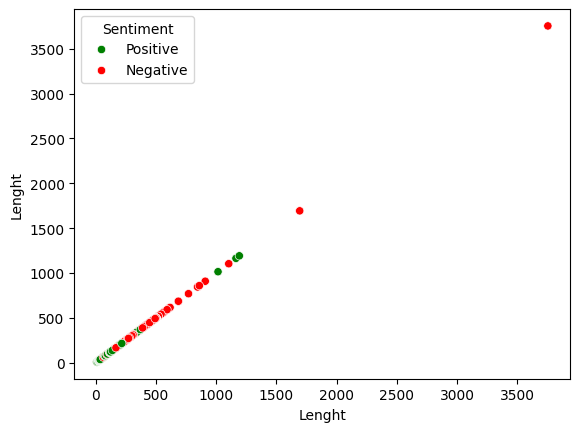

In [28]:
custom_colors = ["green", "red"]
sns.scatterplot(y = df_raw["Lenght"], x = df_raw["Lenght"], hue = df_raw['Sentiment'], palette = custom_colors)

# **After removing stop words and doing lemma**
---

# Basic EDA
---

In [30]:
df_proccesed["Lenght"] = df_proccesed["Review"].str.len()

In [31]:
print(f"Minimal kata : {df_proccesed["Lenght"].min()}" )
print(f"Max kata : {df_proccesed["Lenght"].max()}" )
print(f"mean lenght kata : {df_proccesed["Lenght"].mean()}" )
print(f"median lenght kata : {df_proccesed["Lenght"].median()}" )

Minimal kata : 0
Max kata : 2207
mean lenght kata : 100.00823417263823
median lenght kata : 80.0


Text(0.5, 1.0, 'After lemma')

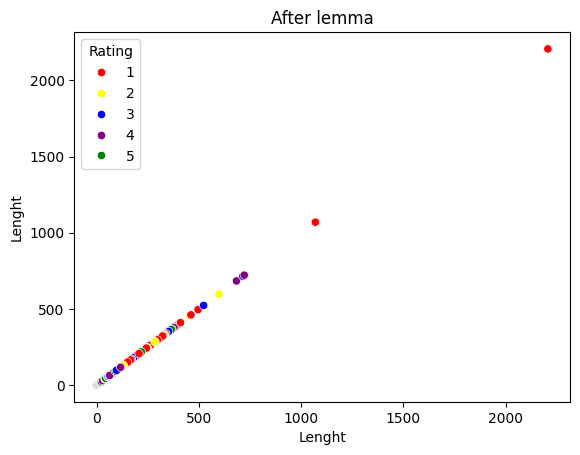

In [34]:
custom_colors = ["red", "yellow", "blue", "purple", "green"]
sns.scatterplot(y = df_proccesed["Lenght"], x = df_proccesed["Lenght"], hue = df_proccesed['Rating'], palette = custom_colors)
plt.title("After lemma")

Text(0.5, 1.0, 'Words lenght to sentiment')

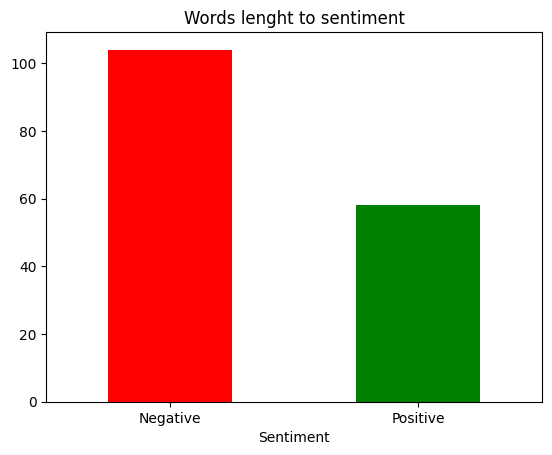

In [43]:
custom_colors = ["green", "red"]
df_proccesed.groupby('Sentiment')["Lenght"].median().plot(kind= "bar", color = ["r", "g"])
plt.xticks(rotation = 0)
plt.title("Words lenght to sentiment")

<Axes: xlabel='Lenght', ylabel='Lenght'>

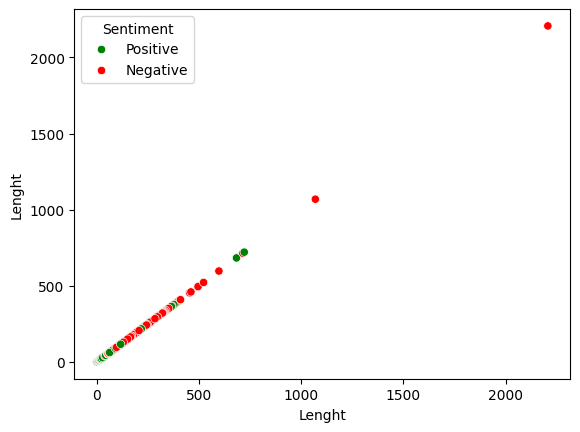

In [39]:
sns.scatterplot(y = df_proccesed["Lenght"], x = df_proccesed["Lenght"], hue = df_proccesed['Sentiment'], palette = custom_colors)

Text(0.5, 1.0, 'Words lenght to rating')

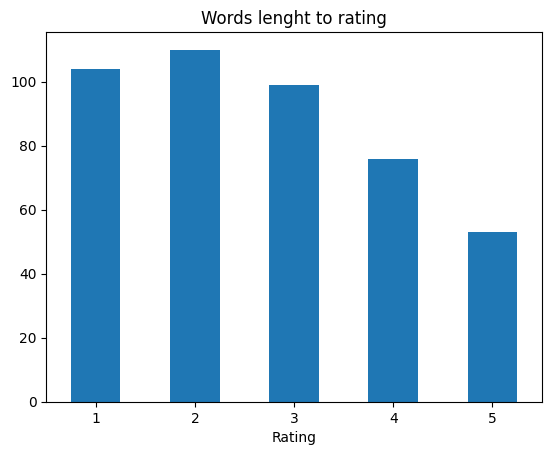

In [40]:
df_proccesed.groupby("Rating")["Lenght"].median().plot(kind= "bar")
plt.xticks(rotation = 0)
plt.title("Words lenght to rating")

In [47]:
df_proccesed

,Review,Rating,Sentiment,Lenght
0,great music service audio high quality app eas...,5,Positive,79
1,please ignore previous negative rating app sup...,5,Positive,69
2,pop get best spotify experience android annoyi...,4,Positive,67
3,really buggy terrible use recently,1,Negative,34
4,dear spotify get song put playlist shuffle play,1,Negative,47
...,...,...,...,...
61589,even though communicated lyric feature availab...,1,Negative,164
61590,use sooo good back downloaded free version pic...,1,Negative,150
61591,app would good taking device start comp spotif...,2,Negative,284
61592,app good hard navigate let play song click pla...,2,Negative,129


In [50]:
def sentiments(S):
    world_List = defaultdict(int)

    for words in df_proccesed["Review"][df_proccesed['Sentiment'] == S]:
        for w in words.split(' '):
            world_List[str(w)] += 1
            
        
    # Display
    
    word_list = pd.DataFrame(world_List.items(), columns= ["words",'jumlah'])
    word_list_sorted = word_list.sort_values(by = 'jumlah', ascending= False)
    display(word_list_sorted.head(10))
    
    
    # plots
    word_list_sorted = pd.DataFrame(word_list_sorted)
    sns.barplot(data = word_list_sorted.iloc[0:10], x = 'words', y = "jumlah" )
    plt.title(f"{S} bar plot")
    plt.show()
    # Make the word cloud 
    cloud = WordCloud(width = 1500, height= 1200, max_words= 50).generate_from_frequencies(world_List)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{S} word cloud")
    plt.show()

,words,jumlah
8,song,22282
18,app,20489
12,play,11006
63,music,10339
6,spotify,9661
65,ad,6929
10,playlist,6634
102,premium,5731
154,even,5465
21,playing,5444


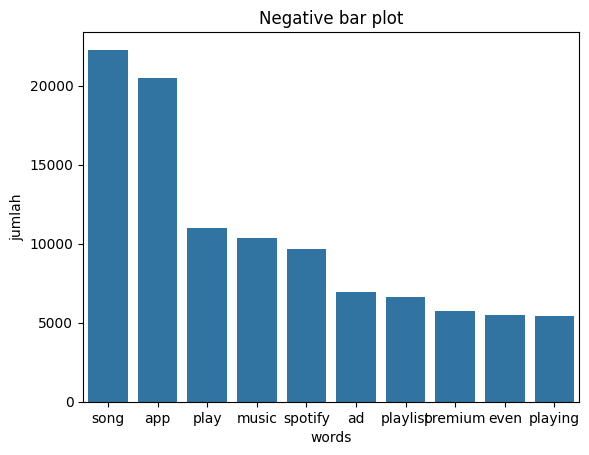

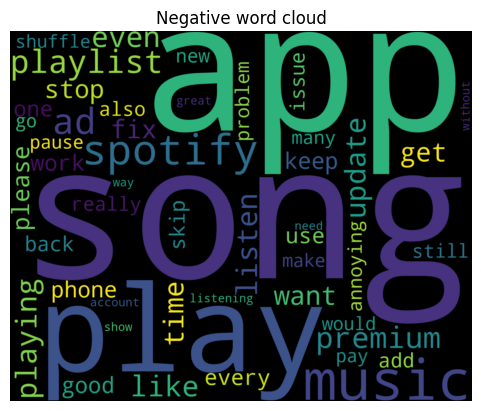

In [52]:
sentiments('Negative')

,words,jumlah
6,app,15290
1,music,15199
35,song,11081
25,spotify,9369
31,love,7428
105,good,5600
0,great,5421
48,like,4692
60,listen,4030
24,best,4000


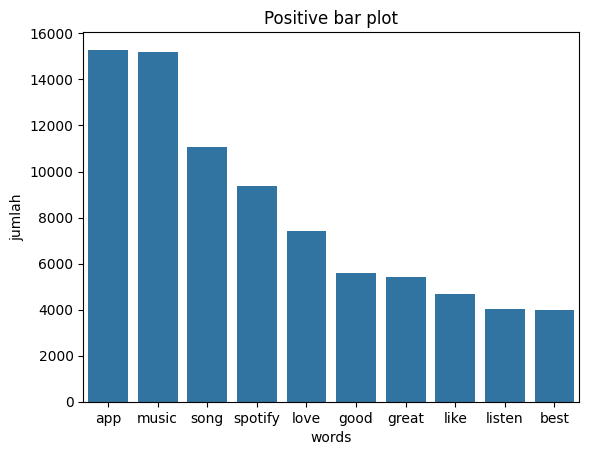

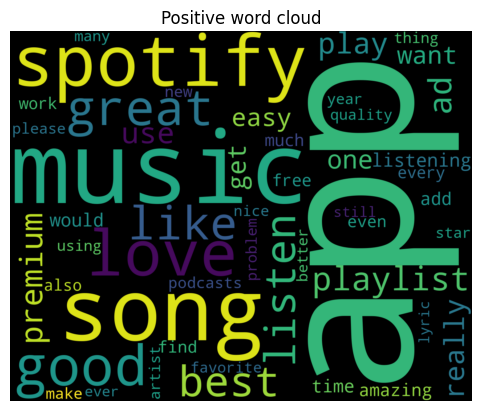

In [51]:
sentiments("Positive")